In [1]:
from core import (
    DEFAULT_DATA_ROOT,
    load_tone_success_punish_trials,
    run_cebra_time_success_punish
)

neural_success, neural_punish, tone_mat_paths = load_tone_success_punish_trials(
    DEFAULT_DATA_ROOT
)

print("success:", neural_success.shape)
print("punish :", neural_punish.shape)



/Users/timothylantin/miniforge3/envs/cebra-env/lib/python3.10/site-packages/cebra/integrations/sklearn/cebra.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


success: (1234, 119, 75)
punish : (1234, 115, 77)


In [2]:
# Cell 2 — load trial-wise SUCCESS / PUNISH matrices

data_root = DEFAULT_DATA_ROOT
neural_success, neural_punish, tone_mat_paths = load_tone_success_punish_trials(data_root)

print("neural_success shape:", neural_success.shape)  # expect (N_succ, T, n_units)
print("neural_punish  shape:", neural_punish.shape)   # expect (N_pun,  T, n_units)


neural_success shape: (1234, 119, 75)
neural_punish  shape: (1234, 115, 77)


In [3]:
# Cell 3 — run CEBRA-time and compute mean trajectories

(
    mean_success,
    mean_punish,
    success_trajs,
    punish_trajs,
    emb_time,
    trial_ids,
    labels_time,
    cebra_time,
) = run_cebra_time_success_punish(
    neural_success,
    neural_punish,
    n_points=100,  # resampled trajectory length
    # tweak hyperparams here if you want, e.g.:
    # max_iterations=4000,
    # temperature=2.0,
)

print("mean_success shape:", mean_success.shape)   # (100, 3)
print("mean_punish  shape:", mean_punish.shape)    # (100, 3)
print("success_trajs shape:", success_trajs.shape) # (N_succ, 100, 3)
print("punish_trajs  shape:", punish_trajs.shape)  # (N_pun,  100, 3)


pos: -0.4846 neg:  5.5976 total:  5.1130 temperature:  2.0000: 100%|██████████| 4000/4000 [01:27<00:00, 45.87it/s]
pos: -0.4469 neg:  5.5936 total:  5.1467 temperature:  2.0000: 100%|██████████| 4000/4000 [01:15<00:00, 52.70it/s]


mean_success shape: (100, 3)
mean_punish  shape: (100, 3)
success_trajs shape: (1234, 100, 3)
punish_trajs  shape: (1234, 100, 3)


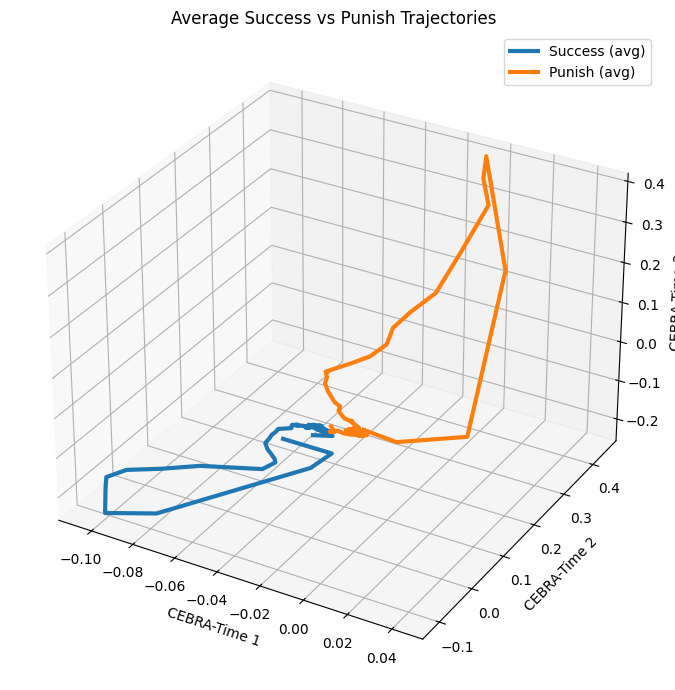

In [4]:
# Cell 4 — plot 3D average success vs punish trajectories

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot(
    mean_success[:, 0],
    mean_success[:, 1],
    mean_success[:, 2],
    linewidth=3,
    label="Success (avg)",
)

ax.plot(
    mean_punish[:, 0],
    mean_punish[:, 1],
    mean_punish[:, 2],
    linewidth=3,
    label="Punish (avg)",
)

ax.set_xlabel("CEBRA-Time 1")
ax.set_ylabel("CEBRA-Time 2")
ax.set_zlabel("CEBRA-Time 3")
ax.set_title("Average Success vs Punish Trajectories")
ax.legend()
plt.tight_layout()
plt.show()
